# Description

This notebook runs some pre-analyses using spectral clustering to explore the best set of parameters to cluster `z_score_std` data version.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

2

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=2
env: OPEN_BLAS_NUM_THREADS=2
env: NUMEXPR_NUM_THREADS=2
env: OMP_NUM_THREADS=2


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 30000

# Z-score standardized data

In [6]:
INPUT_SUBSET = "z_score_std"

In [7]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [9]:
data = pd.read_pickle(input_filepath)

In [10]:
data.shape

(3752, 987)

In [11]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


# Clustering

In [12]:
from sklearn.cluster import SpectralClustering

from clustering.utils import compute_performance

## `gamma` parameter

### Using default value (`gamma=1.0`)

In [13]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        #         eigen_tol=1e-2,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=1.00,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances 

In [14]:
# show number of clusters and their size
_tmp = pd.Series(part).value_counts()
display(_tmp)
assert _tmp.shape[0] == 1

0    3752
dtype: int64

The algorithm does not work with the default `gamma=1.0`. Other values for this parameter should be explored.

### Using `gamma=5.00`

In [15]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        #         eigen_tol=1e-2,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=5.00,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/mnt/software/miniconda3/envs/phenoplier2/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b

In [16]:
# show number of clusters and their size
_tmp = pd.Series(part).value_counts()
display(_tmp)
assert _tmp.shape[0] == 1

0    3752
dtype: int64

The algorithm does not work either with `gamma>1.0`.

### Using `gamma=0.01`

In [17]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        eigen_tol=1e-3,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=0.01,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

In [18]:
# show number of clusters and their size
_tmp = pd.Series(part).value_counts()
display(_tmp)
assert _tmp.shape[0] == 2
assert 3 < _tmp.loc[1] < 10

0    3747
1       5
dtype: int64

In [19]:
# show some clustering performance measures to assess the quality of the partition
_tmp = compute_performance(data, part)
assert 0.30 < _tmp["si"] < 0.31
assert 10.0 < _tmp["ch"] < 11.00
assert 1.30 < _tmp["db"] < 1.50

'Silhouette (higher is better): 0.305'

'Calinski-Harabasz (higher is better): 10.292'

'Davies-Bouldin (lower is better): 1.400'

For values around `gamma=0.01` the algorithm takes a lot of time to converge (here I used `eigen_tol=1e-03` to force convergence).

### Using `gamma=0.001`

In [20]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        #         eigen_tol=1e-3,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=0.001,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

In [21]:
# show number of clusters and their size
_tmp = pd.Series(part).value_counts()
display(_tmp)
assert _tmp.shape[0] == 2
assert 80 < _tmp.loc[1] < 90

0    3665
1      87
dtype: int64

In [22]:
# show some clustering performance measures to assess the quality of the partition
_tmp = compute_performance(data, part)
assert 0.10 < _tmp["si"] < 0.16
assert 40.0 < _tmp["ch"] < 42.00
assert 3.00 < _tmp["db"] < 4.00

'Silhouette (higher is better): 0.151'

'Calinski-Harabasz (higher is better): 41.033'

'Davies-Bouldin (lower is better): 3.024'

For values around `gamma=0.001` now the algorithm converges, although most of the performance measures are worse. This suggests smaller values should be explored for this parameter.

## Extended test

Here I run some test across several `k` and `gamma` values; then I check how results perform with different clustering quality measures.

In [23]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_RANGE"] = [2, 4, 6, 8, 10, 20, 30, 40, 50, 60]
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10
CLUSTERING_OPTIONS["GAMMAS"] = [
    1e-03,
    #     1e-04,
    #     1e-05,
    1e-05,
    #     1e-06,
    #     1e-07,
    #     1e-08,
    #     1e-09,
    1e-10,
    #     1e-11,
    #     1e-12,
    #     1e-13,
    #     1e-14,
    1e-15,
    1e-17,
    1e-20,
    1e-30,
    1e-40,
    1e-50,
]
CLUSTERING_OPTIONS["AFFINITY"] = "rbf"

display(CLUSTERING_OPTIONS)

{'K_RANGE': [2, 4, 6, 8, 10, 20, 30, 40, 50, 60],
 'N_REPS_PER_K': 5,
 'KMEANS_N_INIT': 10,
 'GAMMAS': [0.001, 1e-05, 1e-10, 1e-15, 1e-17, 1e-20, 1e-30, 1e-40, 1e-50],
 'AFFINITY': 'rbf'}

In [24]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in CLUSTERING_OPTIONS["K_RANGE"]:
    for gamma_value in CLUSTERING_OPTIONS["GAMMAS"]:
        for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
            clus = SpectralClustering(
                eigen_solver="arpack",
                n_clusters=k,
                n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
                affinity=CLUSTERING_OPTIONS["AFFINITY"],
                gamma=gamma_value,
                random_state=random_state,
            )

            method_name = type(clus).__name__
            CLUSTERERS[f"{method_name} #{idx}"] = clus

            random_state = random_state + 1
            idx = idx + 1

In [25]:
display(len(CLUSTERERS))

450

In [26]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('SpectralClustering #0',
 SpectralClustering(eigen_solver='arpack', gamma=0.001, n_clusters=2,
                    random_state=30000))

('SpectralClustering #1',
 SpectralClustering(eigen_solver='arpack', gamma=0.001, n_clusters=2,
                    random_state=30001))

In [27]:
clustering_method_name = method_name
display(clustering_method_name)

'SpectralClustering'

## Generate ensemble

In [28]:
import tempfile
from clustering.ensembles.utils import generate_ensemble

In [29]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=["n_clusters", "gamma"],
)

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 1/450 [00:01<10:48,  1.45s/it]

  0%|          | 2/450 [00:02<10:48,  1.45s/it]

  1%|          | 3/450 [00:04<10:47,  1.45s/it]

  1%|          | 4/450 [00:05<10:46,  1.45s/it]

  1%|          | 5/450 [00:07<10:44,  1.45s/it]

  1%|▏         | 6/450 [00:08<10:29,  1.42s/it]

  2%|▏         | 7/450 [00:09<10:19,  1.40s/it]

  2%|▏         | 8/450 [00:11<10:10,  1.38s/it]

  2%|▏         | 9/450 [00:12<10:03,  1.37s/it]

  2%|▏         | 10/450 [00:13<09:59,  1.36s/it]

  2%|▏         | 11/450 [00:15<09:58,  1.36s/it]

  3%|▎         | 12/450 [00:16<09:55,  1.36s/it]

  3%|▎         | 13/450 [00:18<09:53,  1.36s/it]

  3%|▎         | 14/450 [00:19<09:51,  1.36s/it]

  3%|▎         | 15/450 [00:20<09:50,  1.36s/it]

  4%|▎         | 16/450 [00:22<09:49,  1.36s/it]

  4%|▍         | 17/450 [00:23<09:49,  1.36s/it]

  4%|▍         | 18/450 [00:24<09:47,  1.36s/it]

  4%|▍         | 19/450 [00:26<09:46,  1.36s/it]

  4%|▍         | 20/450 [00:27<09:45,  1.36s/it]

  5%|▍         | 21/450 [00:28<09:41,  1.36s/it]

  5%|▍         | 22/450 [00:30<09:39,  1.35s/it]

  5%|▌         | 23/450 [00:31<09:50,  1.38s/it]

  5%|▌         | 24/450 [00:33<09:46,  1.38s/it]

  6%|▌         | 25/450 [00:34<09:43,  1.37s/it]

  6%|▌         | 26/450 [00:35<09:22,  1.33s/it]

  6%|▌         | 27/450 [00:36<09:07,  1.30s/it]

  6%|▌         | 28/450 [00:38<08:59,  1.28s/it]

  6%|▋         | 29/450 [00:39<08:50,  1.26s/it]

  7%|▋         | 30/450 [00:40<08:48,  1.26s/it]

  7%|▋         | 31/450 [00:41<08:55,  1.28s/it]

  7%|▋         | 32/450 [00:43<08:49,  1.27s/it]

  7%|▋         | 33/450 [00:44<08:43,  1.26s/it]

  8%|▊         | 34/450 [00:45<08:38,  1.25s/it]

  8%|▊         | 35/450 [00:46<08:48,  1.27s/it]

  8%|▊         | 36/450 [00:48<08:39,  1.26s/it]

  8%|▊         | 37/450 [00:49<08:33,  1.24s/it]

  8%|▊         | 38/450 [00:50<08:29,  1.24s/it]

  9%|▊         | 39/450 [00:51<08:25,  1.23s/it]

  9%|▉         | 40/450 [00:53<08:24,  1.23s/it]

  9%|▉         | 41/450 [00:54<08:22,  1.23s/it]

  9%|▉         | 42/450 [00:55<08:21,  1.23s/it]

 10%|▉         | 43/450 [00:56<08:19,  1.23s/it]

 10%|▉         | 44/450 [00:57<08:16,  1.22s/it]

 10%|█         | 45/450 [00:59<08:15,  1.22s/it]

 10%|█         | 46/450 [01:00<08:51,  1.32s/it]

 10%|█         | 47/450 [01:02<09:16,  1.38s/it]

 11%|█         | 48/450 [01:03<09:33,  1.43s/it]

 11%|█         | 49/450 [01:05<09:44,  1.46s/it]

 11%|█         | 50/450 [01:06<09:51,  1.48s/it]

 11%|█▏        | 51/450 [01:08<09:58,  1.50s/it]

 12%|█▏        | 52/450 [01:09<10:01,  1.51s/it]

 12%|█▏        | 53/450 [01:11<10:01,  1.52s/it]

 12%|█▏        | 54/450 [01:12<10:04,  1.53s/it]

 12%|█▏        | 55/450 [01:14<10:04,  1.53s/it]

 12%|█▏        | 56/450 [01:15<09:54,  1.51s/it]

 13%|█▎        | 57/450 [01:17<09:47,  1.49s/it]

 13%|█▎        | 58/450 [01:18<09:42,  1.49s/it]

 13%|█▎        | 59/450 [01:20<09:38,  1.48s/it]

 13%|█▎        | 60/450 [01:21<09:33,  1.47s/it]

 14%|█▎        | 61/450 [01:23<09:23,  1.45s/it]

 14%|█▍        | 62/450 [01:24<09:16,  1.43s/it]

 14%|█▍        | 63/450 [01:26<09:17,  1.44s/it]

 14%|█▍        | 64/450 [01:27<09:10,  1.43s/it]

 14%|█▍        | 65/450 [01:28<09:03,  1.41s/it]

 15%|█▍        | 66/450 [01:30<09:07,  1.43s/it]

 15%|█▍        | 67/450 [01:31<09:08,  1.43s/it]

 15%|█▌        | 68/450 [01:33<09:10,  1.44s/it]

 15%|█▌        | 69/450 [01:34<09:02,  1.42s/it]

 16%|█▌        | 70/450 [01:35<08:57,  1.41s/it]

 16%|█▌        | 71/450 [01:37<08:45,  1.39s/it]

 16%|█▌        | 72/450 [01:38<08:37,  1.37s/it]

 16%|█▌        | 73/450 [01:39<08:31,  1.36s/it]

 16%|█▋        | 74/450 [01:41<08:18,  1.32s/it]

 17%|█▋        | 75/450 [01:42<08:14,  1.32s/it]

 17%|█▋        | 76/450 [01:43<08:17,  1.33s/it]

 17%|█▋        | 77/450 [01:45<08:08,  1.31s/it]

 17%|█▋        | 78/450 [01:46<08:01,  1.29s/it]

 18%|█▊        | 79/450 [01:47<08:02,  1.30s/it]

 18%|█▊        | 80/450 [01:48<07:53,  1.28s/it]

 18%|█▊        | 81/450 [01:50<08:11,  1.33s/it]

 18%|█▊        | 82/450 [01:51<08:20,  1.36s/it]

 18%|█▊        | 83/450 [01:53<08:12,  1.34s/it]

 19%|█▊        | 84/450 [01:54<08:14,  1.35s/it]

 19%|█▉        | 85/450 [01:55<08:13,  1.35s/it]

 19%|█▉        | 86/450 [01:57<08:09,  1.34s/it]

 19%|█▉        | 87/450 [01:58<08:13,  1.36s/it]

 20%|█▉        | 88/450 [01:59<08:08,  1.35s/it]

 20%|█▉        | 89/450 [02:01<08:06,  1.35s/it]

 20%|██        | 90/450 [02:02<07:59,  1.33s/it]

 20%|██        | 91/450 [02:04<08:22,  1.40s/it]

 20%|██        | 92/450 [02:05<08:38,  1.45s/it]

 21%|██        | 93/450 [02:07<08:49,  1.48s/it]

 21%|██        | 94/450 [02:08<08:56,  1.51s/it]

 21%|██        | 95/450 [02:10<09:00,  1.52s/it]

 21%|██▏       | 96/450 [02:11<09:06,  1.54s/it]

 22%|██▏       | 97/450 [02:13<09:10,  1.56s/it]

 22%|██▏       | 98/450 [02:15<09:10,  1.56s/it]

 22%|██▏       | 99/450 [02:16<09:11,  1.57s/it]

 22%|██▏       | 100/450 [02:18<09:10,  1.57s/it]

 22%|██▏       | 101/450 [02:19<09:04,  1.56s/it]

 23%|██▎       | 102/450 [02:21<09:01,  1.56s/it]

 23%|██▎       | 103/450 [02:22<08:58,  1.55s/it]

 23%|██▎       | 104/450 [02:24<08:57,  1.55s/it]

 23%|██▎       | 105/450 [02:25<08:54,  1.55s/it]

 24%|██▎       | 106/450 [02:27<08:45,  1.53s/it]

 24%|██▍       | 107/450 [02:28<08:43,  1.52s/it]

 24%|██▍       | 108/450 [02:30<08:37,  1.51s/it]

 24%|██▍       | 109/450 [02:31<08:32,  1.50s/it]

 24%|██▍       | 110/450 [02:33<08:27,  1.49s/it]

 25%|██▍       | 111/450 [02:34<08:25,  1.49s/it]

 25%|██▍       | 112/450 [02:36<08:25,  1.49s/it]

 25%|██▌       | 113/450 [02:37<08:22,  1.49s/it]

 25%|██▌       | 114/450 [02:39<08:20,  1.49s/it]

 26%|██▌       | 115/450 [02:40<08:18,  1.49s/it]

 26%|██▌       | 116/450 [02:42<07:59,  1.44s/it]

 26%|██▌       | 117/450 [02:43<07:58,  1.44s/it]

 26%|██▌       | 118/450 [02:44<07:45,  1.40s/it]

 26%|██▋       | 119/450 [02:46<07:44,  1.40s/it]

 27%|██▋       | 120/450 [02:47<07:45,  1.41s/it]

 27%|██▋       | 121/450 [02:49<07:41,  1.40s/it]

 27%|██▋       | 122/450 [02:50<07:33,  1.38s/it]

 27%|██▋       | 123/450 [02:51<07:25,  1.36s/it]

 28%|██▊       | 124/450 [02:53<07:19,  1.35s/it]

 28%|██▊       | 125/450 [02:54<07:21,  1.36s/it]

 28%|██▊       | 126/450 [02:56<07:37,  1.41s/it]

 28%|██▊       | 127/450 [02:57<07:26,  1.38s/it]

 28%|██▊       | 128/450 [02:58<07:30,  1.40s/it]

 29%|██▊       | 129/450 [03:00<07:27,  1.39s/it]

 29%|██▉       | 130/450 [03:01<07:19,  1.37s/it]

 29%|██▉       | 131/450 [03:02<07:17,  1.37s/it]

 29%|██▉       | 132/450 [03:04<07:16,  1.37s/it]

 30%|██▉       | 133/450 [03:05<07:21,  1.39s/it]

 30%|██▉       | 134/450 [03:07<07:19,  1.39s/it]

 30%|███       | 135/450 [03:08<07:18,  1.39s/it]

 30%|███       | 136/450 [03:10<07:38,  1.46s/it]

 30%|███       | 137/450 [03:11<07:51,  1.51s/it]

 31%|███       | 138/450 [03:13<08:00,  1.54s/it]

 31%|███       | 139/450 [03:14<08:06,  1.56s/it]

 31%|███       | 140/450 [03:16<08:10,  1.58s/it]

 31%|███▏      | 141/450 [03:18<08:15,  1.60s/it]

 32%|███▏      | 142/450 [03:19<08:16,  1.61s/it]

 32%|███▏      | 143/450 [03:21<08:19,  1.63s/it]

 32%|███▏      | 144/450 [03:23<08:20,  1.64s/it]

 32%|███▏      | 145/450 [03:24<08:17,  1.63s/it]

 32%|███▏      | 146/450 [03:26<08:10,  1.61s/it]

 33%|███▎      | 147/450 [03:27<08:05,  1.60s/it]

 33%|███▎      | 148/450 [03:29<08:02,  1.60s/it]

 33%|███▎      | 149/450 [03:31<08:00,  1.60s/it]

 33%|███▎      | 150/450 [03:32<07:57,  1.59s/it]

 34%|███▎      | 151/450 [03:34<07:54,  1.59s/it]

 34%|███▍      | 152/450 [03:35<07:49,  1.58s/it]

 34%|███▍      | 153/450 [03:37<07:48,  1.58s/it]

 34%|███▍      | 154/450 [03:38<07:45,  1.57s/it]

 34%|███▍      | 155/450 [03:40<07:40,  1.56s/it]

 35%|███▍      | 156/450 [03:42<07:41,  1.57s/it]

 35%|███▍      | 157/450 [03:43<07:38,  1.56s/it]

 35%|███▌      | 158/450 [03:45<07:32,  1.55s/it]

 35%|███▌      | 159/450 [03:46<07:38,  1.58s/it]

 36%|███▌      | 160/450 [03:48<07:32,  1.56s/it]

 36%|███▌      | 161/450 [03:49<07:26,  1.54s/it]

 36%|███▌      | 162/450 [03:51<07:10,  1.50s/it]

 36%|███▌      | 163/450 [03:52<07:03,  1.47s/it]

 36%|███▋      | 164/450 [03:53<06:48,  1.43s/it]

 37%|███▋      | 165/450 [03:55<06:50,  1.44s/it]

 37%|███▋      | 166/450 [03:56<06:44,  1.42s/it]

 37%|███▋      | 167/450 [03:58<06:45,  1.43s/it]

 37%|███▋      | 168/450 [03:59<06:44,  1.43s/it]

 38%|███▊      | 169/450 [04:01<06:45,  1.44s/it]

 38%|███▊      | 170/450 [04:02<06:48,  1.46s/it]

 38%|███▊      | 171/450 [04:04<06:46,  1.46s/it]

 38%|███▊      | 172/450 [04:05<06:42,  1.45s/it]

 38%|███▊      | 173/450 [04:06<06:41,  1.45s/it]

 39%|███▊      | 174/450 [04:08<06:42,  1.46s/it]

 39%|███▉      | 175/450 [04:09<06:38,  1.45s/it]

 39%|███▉      | 176/450 [04:11<06:37,  1.45s/it]

 39%|███▉      | 177/450 [04:12<06:30,  1.43s/it]

 40%|███▉      | 178/450 [04:14<06:33,  1.45s/it]

 40%|███▉      | 179/450 [04:15<06:33,  1.45s/it]

 40%|████      | 180/450 [04:17<06:34,  1.46s/it]

 40%|████      | 181/450 [04:18<06:47,  1.52s/it]

 40%|████      | 182/450 [04:20<06:56,  1.55s/it]

 41%|████      | 183/450 [04:22<07:02,  1.58s/it]

 41%|████      | 184/450 [04:23<07:06,  1.60s/it]

 41%|████      | 185/450 [04:25<07:07,  1.61s/it]

 41%|████▏     | 186/450 [04:27<07:13,  1.64s/it]

 42%|████▏     | 187/450 [04:28<07:18,  1.67s/it]

 42%|████▏     | 188/450 [04:30<07:18,  1.67s/it]

 42%|████▏     | 189/450 [04:32<07:19,  1.69s/it]

 42%|████▏     | 190/450 [04:33<07:21,  1.70s/it]

 42%|████▏     | 191/450 [04:35<07:14,  1.68s/it]

 43%|████▎     | 192/450 [04:37<07:08,  1.66s/it]

 43%|████▎     | 193/450 [04:38<07:04,  1.65s/it]

 43%|████▎     | 194/450 [04:40<07:02,  1.65s/it]

 43%|████▎     | 195/450 [04:42<07:00,  1.65s/it]

 44%|████▎     | 196/450 [04:43<07:00,  1.66s/it]

 44%|████▍     | 197/450 [04:45<06:51,  1.62s/it]

 44%|████▍     | 198/450 [04:47<06:52,  1.64s/it]

 44%|████▍     | 199/450 [04:48<06:56,  1.66s/it]

 44%|████▍     | 200/450 [04:50<06:58,  1.68s/it]

 45%|████▍     | 201/450 [04:52<06:54,  1.66s/it]

 45%|████▍     | 202/450 [04:53<06:42,  1.62s/it]

 45%|████▌     | 203/450 [04:55<06:41,  1.63s/it]

 45%|████▌     | 204/450 [04:56<06:39,  1.62s/it]

 46%|████▌     | 205/450 [04:58<06:41,  1.64s/it]

 46%|████▌     | 206/450 [05:00<06:34,  1.62s/it]

 46%|████▌     | 207/450 [05:01<06:25,  1.59s/it]

 46%|████▌     | 208/450 [05:03<06:18,  1.56s/it]

 46%|████▋     | 209/450 [05:04<06:16,  1.56s/it]

 47%|████▋     | 210/450 [05:06<06:11,  1.55s/it]

 47%|████▋     | 211/450 [05:07<06:07,  1.54s/it]

 47%|████▋     | 212/450 [05:09<05:59,  1.51s/it]

 47%|████▋     | 213/450 [05:10<05:57,  1.51s/it]

 48%|████▊     | 214/450 [05:12<05:55,  1.50s/it]

 48%|████▊     | 215/450 [05:13<05:50,  1.49s/it]

 48%|████▊     | 216/450 [05:15<05:46,  1.48s/it]

 48%|████▊     | 217/450 [05:16<05:46,  1.49s/it]

 48%|████▊     | 218/450 [05:18<05:44,  1.49s/it]

 49%|████▊     | 219/450 [05:19<05:39,  1.47s/it]

 49%|████▉     | 220/450 [05:20<05:40,  1.48s/it]

 49%|████▉     | 221/450 [05:22<05:37,  1.48s/it]

 49%|████▉     | 222/450 [05:24<05:43,  1.51s/it]

 50%|████▉     | 223/450 [05:25<05:37,  1.49s/it]

 50%|████▉     | 224/450 [05:27<05:40,  1.51s/it]

 50%|█████     | 225/450 [05:28<05:40,  1.51s/it]

 50%|█████     | 226/450 [05:30<06:27,  1.73s/it]

 50%|█████     | 227/450 [05:33<07:03,  1.90s/it]

 51%|█████     | 228/450 [05:35<07:23,  2.00s/it]

 51%|█████     | 229/450 [05:37<07:40,  2.08s/it]

 51%|█████     | 230/450 [05:39<07:47,  2.13s/it]

 51%|█████▏    | 231/450 [05:42<07:53,  2.16s/it]

 52%|█████▏    | 232/450 [05:44<08:00,  2.20s/it]

 52%|█████▏    | 233/450 [05:46<08:05,  2.24s/it]

 52%|█████▏    | 234/450 [05:48<08:07,  2.26s/it]

 52%|█████▏    | 235/450 [05:51<08:12,  2.29s/it]

 52%|█████▏    | 236/450 [05:53<08:08,  2.28s/it]

 53%|█████▎    | 237/450 [05:55<08:04,  2.27s/it]

 53%|█████▎    | 238/450 [05:58<07:58,  2.26s/it]

 53%|█████▎    | 239/450 [06:00<07:53,  2.24s/it]

 53%|█████▎    | 240/450 [06:02<07:48,  2.23s/it]

 54%|█████▎    | 241/450 [06:04<07:31,  2.16s/it]

 54%|█████▍    | 242/450 [06:06<07:28,  2.15s/it]

 54%|█████▍    | 243/450 [06:08<07:27,  2.16s/it]

 54%|█████▍    | 244/450 [06:10<07:19,  2.13s/it]

 54%|█████▍    | 245/450 [06:13<07:24,  2.17s/it]

 55%|█████▍    | 246/450 [06:15<07:05,  2.09s/it]

 55%|█████▍    | 247/450 [06:17<07:02,  2.08s/it]

 55%|█████▌    | 248/450 [06:19<07:00,  2.08s/it]

 55%|█████▌    | 249/450 [06:21<06:45,  2.02s/it]

 56%|█████▌    | 250/450 [06:23<06:44,  2.02s/it]

 56%|█████▌    | 251/450 [06:24<06:26,  1.94s/it]

 56%|█████▌    | 252/450 [06:26<06:19,  1.92s/it]

 56%|█████▌    | 253/450 [06:28<06:21,  1.94s/it]

 56%|█████▋    | 254/450 [06:30<06:20,  1.94s/it]

 57%|█████▋    | 255/450 [06:32<06:11,  1.90s/it]

 57%|█████▋    | 256/450 [06:34<06:08,  1.90s/it]

 57%|█████▋    | 257/450 [06:36<06:08,  1.91s/it]

 57%|█████▋    | 258/450 [06:38<06:06,  1.91s/it]

 58%|█████▊    | 259/450 [06:39<05:57,  1.87s/it]

 58%|█████▊    | 260/450 [06:41<05:45,  1.82s/it]

 58%|█████▊    | 261/450 [06:43<05:52,  1.86s/it]

 58%|█████▊    | 262/450 [06:45<05:50,  1.87s/it]

 58%|█████▊    | 263/450 [06:47<05:50,  1.87s/it]

 59%|█████▊    | 264/450 [06:49<05:47,  1.87s/it]

 59%|█████▉    | 265/450 [06:51<05:52,  1.90s/it]

 59%|█████▉    | 266/450 [06:53<05:50,  1.90s/it]

 59%|█████▉    | 267/450 [06:55<05:48,  1.90s/it]

 60%|█████▉    | 268/450 [06:56<05:33,  1.83s/it]

 60%|█████▉    | 269/450 [06:58<05:31,  1.83s/it]

 60%|██████    | 270/450 [07:00<05:35,  1.86s/it]

 60%|██████    | 271/450 [07:03<06:28,  2.17s/it]

 60%|██████    | 272/450 [07:06<07:01,  2.37s/it]

 61%|██████    | 273/450 [07:09<07:23,  2.50s/it]

 61%|██████    | 274/450 [07:11<07:39,  2.61s/it]

 61%|██████    | 275/450 [07:14<07:51,  2.70s/it]

 61%|██████▏   | 276/450 [07:17<08:07,  2.80s/it]

 62%|██████▏   | 277/450 [07:20<08:11,  2.84s/it]

 62%|██████▏   | 278/450 [07:23<08:12,  2.86s/it]

 62%|██████▏   | 279/450 [07:26<08:11,  2.88s/it]

 62%|██████▏   | 280/450 [07:29<08:11,  2.89s/it]

 62%|██████▏   | 281/450 [07:32<08:04,  2.87s/it]

 63%|██████▎   | 282/450 [07:35<07:55,  2.83s/it]

 63%|██████▎   | 283/450 [07:37<07:50,  2.82s/it]

 63%|██████▎   | 284/450 [07:40<07:50,  2.83s/it]

 63%|██████▎   | 285/450 [07:43<07:46,  2.83s/it]

 64%|██████▎   | 286/450 [07:46<07:34,  2.77s/it]

 64%|██████▍   | 287/450 [07:48<07:21,  2.71s/it]

 64%|██████▍   | 288/450 [07:51<07:31,  2.79s/it]

 64%|██████▍   | 289/450 [07:54<07:22,  2.75s/it]

 64%|██████▍   | 290/450 [07:56<07:10,  2.69s/it]

 65%|██████▍   | 291/450 [07:59<06:59,  2.64s/it]

 65%|██████▍   | 292/450 [08:01<06:44,  2.56s/it]

 65%|██████▌   | 293/450 [08:04<06:38,  2.54s/it]

 65%|██████▌   | 294/450 [08:06<06:28,  2.49s/it]

 66%|██████▌   | 295/450 [08:08<06:15,  2.43s/it]

 66%|██████▌   | 296/450 [08:11<06:01,  2.35s/it]

 66%|██████▌   | 297/450 [08:13<05:58,  2.34s/it]

 66%|██████▌   | 298/450 [08:15<05:49,  2.30s/it]

 66%|██████▋   | 299/450 [08:18<05:53,  2.34s/it]

 67%|██████▋   | 300/450 [08:20<05:48,  2.33s/it]

 67%|██████▋   | 301/450 [08:22<05:35,  2.25s/it]

 67%|██████▋   | 302/450 [08:24<05:28,  2.22s/it]

 67%|██████▋   | 303/450 [08:26<05:24,  2.21s/it]

 68%|██████▊   | 304/450 [08:29<05:30,  2.26s/it]

 68%|██████▊   | 305/450 [08:31<05:27,  2.26s/it]

 68%|██████▊   | 306/450 [08:33<05:25,  2.26s/it]

 68%|██████▊   | 307/450 [08:35<05:20,  2.24s/it]

 68%|██████▊   | 308/450 [08:38<05:15,  2.22s/it]

 69%|██████▊   | 309/450 [08:40<05:11,  2.21s/it]

 69%|██████▉   | 310/450 [08:42<05:18,  2.27s/it]

 69%|██████▉   | 311/450 [08:44<05:12,  2.24s/it]

 69%|██████▉   | 312/450 [08:47<05:08,  2.23s/it]

 70%|██████▉   | 313/450 [08:49<05:06,  2.24s/it]

 70%|██████▉   | 314/450 [08:51<05:08,  2.27s/it]

 70%|███████   | 315/450 [08:53<05:05,  2.26s/it]

 70%|███████   | 316/450 [08:57<05:56,  2.66s/it]

 70%|███████   | 317/450 [09:00<06:28,  2.92s/it]

 71%|███████   | 318/450 [09:04<06:55,  3.15s/it]

 71%|███████   | 319/450 [09:08<07:12,  3.30s/it]

 71%|███████   | 320/450 [09:11<07:22,  3.40s/it]

 71%|███████▏  | 321/450 [09:15<07:19,  3.41s/it]

 72%|███████▏  | 322/450 [09:18<07:13,  3.39s/it]

 72%|███████▏  | 323/450 [09:22<07:10,  3.39s/it]

 72%|███████▏  | 324/450 [09:25<07:04,  3.37s/it]

 72%|███████▏  | 325/450 [09:28<06:59,  3.35s/it]

 72%|███████▏  | 326/450 [09:31<06:49,  3.30s/it]

 73%|███████▎  | 327/450 [09:35<06:41,  3.27s/it]

 73%|███████▎  | 328/450 [09:38<06:35,  3.24s/it]

 73%|███████▎  | 329/450 [09:41<06:32,  3.24s/it]

 73%|███████▎  | 330/450 [09:44<06:28,  3.24s/it]

 74%|███████▎  | 331/450 [09:48<06:27,  3.25s/it]

 74%|███████▍  | 332/450 [09:51<06:27,  3.29s/it]

 74%|███████▍  | 333/450 [09:54<06:25,  3.29s/it]

 74%|███████▍  | 334/450 [09:58<06:26,  3.33s/it]

 74%|███████▍  | 335/450 [10:01<06:18,  3.29s/it]

 75%|███████▍  | 336/450 [10:04<05:58,  3.15s/it]

 75%|███████▍  | 337/450 [10:06<05:37,  2.99s/it]

 75%|███████▌  | 338/450 [10:09<05:28,  2.93s/it]

 75%|███████▌  | 339/450 [10:12<05:20,  2.89s/it]

 76%|███████▌  | 340/450 [10:15<05:13,  2.85s/it]

 76%|███████▌  | 341/450 [10:17<05:05,  2.80s/it]

 76%|███████▌  | 342/450 [10:20<04:57,  2.76s/it]

 76%|███████▌  | 343/450 [10:23<04:51,  2.72s/it]

 76%|███████▋  | 344/450 [10:26<04:55,  2.79s/it]

 77%|███████▋  | 345/450 [10:28<04:52,  2.79s/it]

 77%|███████▋  | 346/450 [10:31<04:49,  2.78s/it]

 77%|███████▋  | 347/450 [10:34<04:38,  2.70s/it]

 77%|███████▋  | 348/450 [10:37<04:41,  2.76s/it]

 78%|███████▊  | 349/450 [10:39<04:37,  2.74s/it]

 78%|███████▊  | 350/450 [10:42<04:33,  2.74s/it]

 78%|███████▊  | 351/450 [10:45<04:31,  2.74s/it]

 78%|███████▊  | 352/450 [10:48<04:30,  2.76s/it]

 78%|███████▊  | 353/450 [10:50<04:26,  2.74s/it]

 79%|███████▊  | 354/450 [10:53<04:22,  2.73s/it]

 79%|███████▉  | 355/450 [10:55<04:14,  2.67s/it]

 79%|███████▉  | 356/450 [10:58<04:05,  2.61s/it]

 79%|███████▉  | 357/450 [11:01<04:09,  2.68s/it]

 80%|███████▉  | 358/450 [11:03<04:05,  2.67s/it]

 80%|███████▉  | 359/450 [11:06<04:07,  2.73s/it]

 80%|████████  | 360/450 [11:09<04:04,  2.72s/it]

 80%|████████  | 361/450 [11:13<04:47,  3.23s/it]

 80%|████████  | 362/450 [11:18<05:13,  3.56s/it]

 81%|████████  | 363/450 [11:22<05:28,  3.77s/it]

 81%|████████  | 364/450 [11:26<05:38,  3.94s/it]

 81%|████████  | 365/450 [11:31<05:45,  4.06s/it]

 81%|████████▏ | 366/450 [11:35<05:35,  3.99s/it]

 82%|████████▏ | 367/450 [11:38<05:29,  3.97s/it]

 82%|████████▏ | 368/450 [11:42<05:24,  3.95s/it]

 82%|████████▏ | 369/450 [11:46<05:18,  3.93s/it]

 82%|████████▏ | 370/450 [11:50<05:12,  3.91s/it]

 82%|████████▏ | 371/450 [11:54<05:02,  3.83s/it]

 83%|████████▎ | 372/450 [11:57<04:55,  3.78s/it]

 83%|████████▎ | 373/450 [12:01<04:48,  3.75s/it]

 83%|████████▎ | 374/450 [12:05<04:43,  3.73s/it]

 83%|████████▎ | 375/450 [12:08<04:38,  3.72s/it]

 84%|████████▎ | 376/450 [12:12<04:35,  3.72s/it]

 84%|████████▍ | 377/450 [12:16<04:32,  3.74s/it]

 84%|████████▍ | 378/450 [12:20<04:35,  3.82s/it]

 84%|████████▍ | 379/450 [12:24<04:32,  3.83s/it]

 84%|████████▍ | 380/450 [12:28<04:25,  3.79s/it]

 85%|████████▍ | 381/450 [12:31<04:14,  3.68s/it]

 85%|████████▍ | 382/450 [12:34<03:58,  3.51s/it]

 85%|████████▌ | 383/450 [12:37<03:44,  3.36s/it]

 85%|████████▌ | 384/450 [12:40<03:39,  3.32s/it]

 86%|████████▌ | 385/450 [12:44<03:33,  3.29s/it]

 86%|████████▌ | 386/450 [12:47<03:34,  3.35s/it]

 86%|████████▌ | 387/450 [12:50<03:26,  3.28s/it]

 86%|████████▌ | 388/450 [12:54<03:26,  3.33s/it]

 86%|████████▋ | 389/450 [12:57<03:19,  3.27s/it]

 87%|████████▋ | 390/450 [13:00<03:15,  3.25s/it]

 87%|████████▋ | 391/450 [13:03<03:09,  3.20s/it]

 87%|████████▋ | 392/450 [13:05<02:53,  2.99s/it]

 87%|████████▋ | 393/450 [13:09<02:53,  3.04s/it]

 88%|████████▊ | 394/450 [13:12<02:53,  3.10s/it]

 88%|████████▊ | 395/450 [13:15<02:53,  3.16s/it]

 88%|████████▊ | 396/450 [13:18<02:51,  3.17s/it]

 88%|████████▊ | 397/450 [13:21<02:46,  3.15s/it]

 88%|████████▊ | 398/450 [13:25<02:44,  3.16s/it]

 89%|████████▊ | 399/450 [13:28<02:43,  3.21s/it]

 89%|████████▉ | 400/450 [13:31<02:42,  3.24s/it]

 89%|████████▉ | 401/450 [13:35<02:38,  3.24s/it]

 89%|████████▉ | 402/450 [13:38<02:39,  3.31s/it]

 90%|████████▉ | 403/450 [13:41<02:33,  3.27s/it]

 90%|████████▉ | 404/450 [13:44<02:23,  3.11s/it]

 90%|█████████ | 405/450 [13:47<02:20,  3.13s/it]

 90%|█████████ | 406/450 [13:52<02:39,  3.62s/it]

 90%|█████████ | 407/450 [13:57<02:50,  3.95s/it]

 91%|█████████ | 408/450 [14:01<02:56,  4.19s/it]

 91%|█████████ | 409/450 [14:06<02:58,  4.35s/it]

 91%|█████████ | 410/450 [14:11<02:58,  4.47s/it]

 91%|█████████▏| 411/450 [14:15<02:51,  4.40s/it]

 92%|█████████▏| 412/450 [14:19<02:44,  4.32s/it]

 92%|█████████▏| 413/450 [14:23<02:38,  4.28s/it]

 92%|█████████▏| 414/450 [14:28<02:33,  4.25s/it]

 92%|█████████▏| 415/450 [14:32<02:28,  4.24s/it]

 92%|█████████▏| 416/450 [14:36<02:22,  4.20s/it]

 93%|█████████▎| 417/450 [14:40<02:17,  4.16s/it]

 93%|█████████▎| 418/450 [14:44<02:11,  4.11s/it]

 93%|█████████▎| 419/450 [14:48<02:07,  4.11s/it]

 93%|█████████▎| 420/450 [14:52<02:02,  4.08s/it]

 94%|█████████▎| 421/450 [14:56<01:56,  4.02s/it]

 94%|█████████▍| 422/450 [15:00<01:54,  4.07s/it]

 94%|█████████▍| 423/450 [15:04<01:49,  4.05s/it]

 94%|█████████▍| 424/450 [15:09<01:49,  4.20s/it]

 94%|█████████▍| 425/450 [15:13<01:46,  4.24s/it]

 95%|█████████▍| 426/450 [15:17<01:39,  4.15s/it]

 95%|█████████▍| 427/450 [15:20<01:31,  3.97s/it]

 95%|█████████▌| 428/450 [15:24<01:25,  3.88s/it]

 95%|█████████▌| 429/450 [15:28<01:21,  3.87s/it]

 96%|█████████▌| 430/450 [15:32<01:18,  3.91s/it]

 96%|█████████▌| 431/450 [15:35<01:10,  3.71s/it]

 96%|█████████▌| 432/450 [15:39<01:06,  3.67s/it]

 96%|█████████▌| 433/450 [15:42<01:01,  3.59s/it]

 96%|█████████▋| 434/450 [15:46<00:57,  3.62s/it]

 97%|█████████▋| 435/450 [15:49<00:52,  3.53s/it]

 97%|█████████▋| 436/450 [15:53<00:49,  3.51s/it]

 97%|█████████▋| 437/450 [15:56<00:45,  3.53s/it]

 97%|█████████▋| 438/450 [16:00<00:42,  3.57s/it]

 98%|█████████▊| 439/450 [16:03<00:38,  3.53s/it]

 98%|█████████▊| 440/450 [16:07<00:35,  3.54s/it]

 98%|█████████▊| 441/450 [16:11<00:32,  3.57s/it]

 98%|█████████▊| 442/450 [16:14<00:28,  3.54s/it]

 98%|█████████▊| 443/450 [16:18<00:24,  3.51s/it]

 99%|█████████▊| 444/450 [16:21<00:21,  3.55s/it]

 99%|█████████▉| 445/450 [16:25<00:17,  3.52s/it]

 99%|█████████▉| 446/450 [16:28<00:14,  3.59s/it]

 99%|█████████▉| 447/450 [16:32<00:10,  3.47s/it]

100%|█████████▉| 448/450 [16:35<00:06,  3.50s/it]

100%|█████████▉| 449/450 [16:39<00:03,  3.61s/it]

100%|██████████| 450/450 [16:43<00:00,  3.65s/it]

100%|██████████| 450/450 [16:43<00:00,  2.23s/it]

In [30]:
ensemble.shape

(450, 4)

In [31]:
ensemble.head()

,clusterer_params,partition,n_clusters,gamma
clusterer_id,,,,
SpectralClustering #0,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #1,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #2,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #3,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #4,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001


In [32]:
ensemble["gamma"] = ensemble["gamma"].apply(lambda x: f"{x:.1e}")

In [33]:
ensemble["n_clusters"].value_counts()

60    45
50    45
40    45
30    45
20    45
10    45
8     45
6     45
4     45
2     45
Name: n_clusters, dtype: int64

In [34]:
_tmp = ensemble["n_clusters"].value_counts().unique()
assert _tmp.shape[0] == 1
assert _tmp[0] == int(
    CLUSTERING_OPTIONS["N_REPS_PER_K"] * len(CLUSTERING_OPTIONS["GAMMAS"])
)

In [35]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    450.000000
mean      23.000000
std       19.846291
min        2.000000
25%        6.000000
50%       15.000000
75%       40.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [36]:
assert ensemble_stats["min"] > 1

In [37]:
assert not ensemble["n_clusters"].isna().any()

In [38]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [39]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [40]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])
assert not np.any(
    [pd.Series(part["partition"]).isna().any() for idx, part in ensemble.iterrows()]
)

In [41]:
# check that the number of clusters in the partitions are the expected ones
_real_k_values = ensemble["partition"].apply(lambda x: np.unique(x).shape[0])
display(_real_k_values)
assert np.all(ensemble["n_clusters"].values == _real_k_values.values)

clusterer_id
SpectralClustering #0       2
SpectralClustering #1       2
SpectralClustering #2       2
SpectralClustering #3       2
SpectralClustering #4       2
                           ..
SpectralClustering #445    60
SpectralClustering #446    60
SpectralClustering #447    60
SpectralClustering #448    60
SpectralClustering #449    60
Name: partition, Length: 450, dtype: int64

## Add clustering quality measures

In [42]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

In [43]:
ensemble = ensemble.assign(
    si_score=ensemble["partition"].apply(lambda x: silhouette_score(data, x)),
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x)),
    db_score=ensemble["partition"].apply(lambda x: davies_bouldin_score(data, x)),
)

In [44]:
ensemble.shape

(450, 7)

In [45]:
ensemble.head()

,clusterer_params,partition,n_clusters,gamma,si_score,ch_score,db_score
clusterer_id,,,,,,,
SpectralClustering #0,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,0.150591,41.033402,3.024181
SpectralClustering #1,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,0.150591,41.033402,3.024181
SpectralClustering #2,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,0.150591,41.033402,3.024181
SpectralClustering #3,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,0.150591,41.033402,3.024181
SpectralClustering #4,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,0.150591,41.033402,3.024181


# Cluster quality

In [46]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters", "gamma"]).mean()
    display(_df)

si_score   ch_score   db_score
n_clusters gamma                                  
2          1.0e-03  0.150591  41.033402   3.024181
           1.0e-05  0.115500  48.835638   4.233984
           1.0e-10  0.115500  48.835638   4.233984
           1.0e-15  0.110206  48.621876   4.361577
           1.0e-17 -0.003217   1.001528   8.903445
           1.0e-20 -0.001429   1.042379  17.918396
           1.0e-30  0.002102   0.998253  25.938657
           1.0e-40  0.008068   1.027829   6.679372
           1.0e-50  0.004239   0.955074  11.985777
4          1.0e-03  0.078817  20.727474   1.706998
           1.0e-05  0.076045  26.753358   2.995443
           1.0e-10  0.079387  26.813536   3.018086
           1.0e-15  0.065600  26.915540   3.534388
           1.0e-17 -0.017939   1.003614  19.950411
           1.0e-20 -0.010200   1.029468  20.414273
           1.0e-30 -0.013717   0.973200  18.315348
           1.0e-40 -0.007470   1.007899  11.569401
           1.0e-50 -0.011378   1.011299  18.275736
6          1.0e-03  0.103986  13.017423   1.082495
           1.0e-05  0.059819  21.267711   3.029618
           1.0e-10  0.042455  21.200700   3.335703
           1.0e-15  0.016983  21.529531   4.742925
           1.0e-17 -0.030128   0.989083  22.733668
           1.0e-20 -0.037293   0.982144  16.638146
           1.0e-30 -0.011646   1.016130  15.926247
           1.0e-40 -0.031208   0.985478  10.427630
           1.0e-50 -0.016274   1.010549  18.181217
8          1.0e-03  0.082819  12.333725   1.229475
           1.0e-05  0.018254  19.081450   3.780601
           1.0e-10  0.014179  18.705418   5.536760
           1.0e-15  0.010458  18.428874   7.075794
           1.0e-17 -0.025015   1.000551  17.201551
           1.0e-20 -0.018591   1.018767  16.024628
           1.0e-30 -0.017955   1.010126  18.808013
           1.0e-40 -0.028988   0.997285  14.127973
           1.0e-50 -0.020126   1.015440  16.096001
10         1.0e-03  0.084417  11.535573   1.097601
           1.0e-05  0.010778  17.026554   5.897892
           1.0e-10  0.011103  17.020568   5.681249
           1.0e-15  0.005791  15.609472   8.948770
           1.0e-17 -0.019612   1.011058  12.277929
           1.0e-20 -0.019378   0.992747  14.998366
           1.0e-30 -0.025109   0.983961  12.283353
           1.0e-40 -0.018929   1.025469  13.933775
           1.0e-50 -0.026812   1.010606  15.584400
20         1.0e-03  0.010572  10.163655   2.421446
           1.0e-05  0.006207  11.549773   6.472166
           1.0e-10  0.005902  11.355356   6.739568
           1.0e-15  0.002759  10.172253   9.084643
           1.0e-17 -0.048648   0.996599   9.462206
           1.0e-20 -0.032289   1.016761  10.665900
           1.0e-30 -0.029503   1.036246  11.047230
           1.0e-40 -0.046406   0.989425  10.806898
           1.0e-50 -0.072156   1.000276   9.492275
30         1.0e-03  0.004226   8.552771   3.442563
           1.0e-05  0.001795   8.979579   6.485192
           1.0e-10  0.002774   9.024807   6.243959
           1.0e-15  0.002125   7.602804   8.746604
           1.0e-17 -0.086008   1.003078   8.372621
           1.0e-20 -0.063216   1.034432   7.987213
           1.0e-30 -0.053333   1.004962   9.189640
           1.0e-40 -0.048905   0.996519   8.578253
           1.0e-50 -0.055735   1.005768   7.293853
40         1.0e-03 -0.000231   7.513210   3.816455
           1.0e-05  0.001366   7.590853   6.202477
           1.0e-10  0.002545   7.542828   6.192754
           1.0e-15  0.000853   6.177065   8.462733
           1.0e-17 -0.075604   1.015395   7.452214
           1.0e-20 -0.048360   1.006736   7.465529
           1.0e-30 -0.073960   1.009566   7.083315
           1.0e-40 -0.065871   1.034402   7.402041
           1.0e-50 -0.061112   1.016439   7.789837
50         1.0e-03 -0.001141   6.636880   4.005213
           1.0e-05  0.005228   6.677467   5.986572
           1.0e-10  0.001216   6.746160   5.710713
           1.0e-15 -0.016907   5.175139   8.118365
           1.0e-17 -0.087778   1.012669   

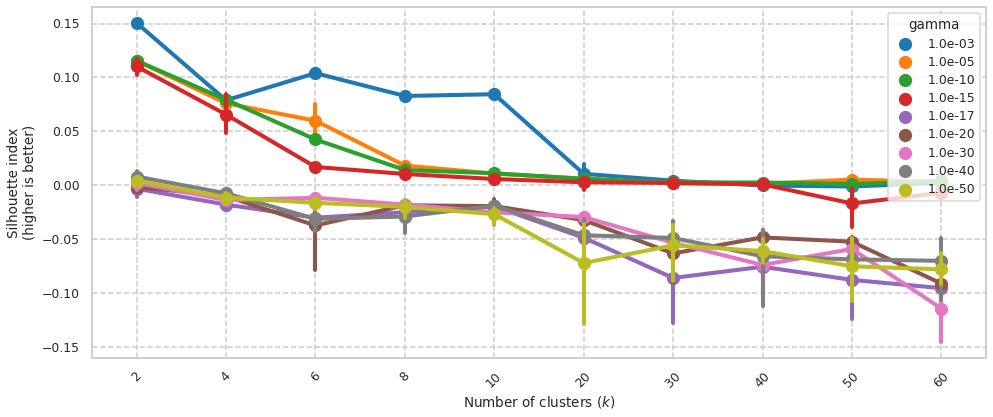

In [47]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="si_score", hue="gamma")
    ax.set_ylabel("Silhouette index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

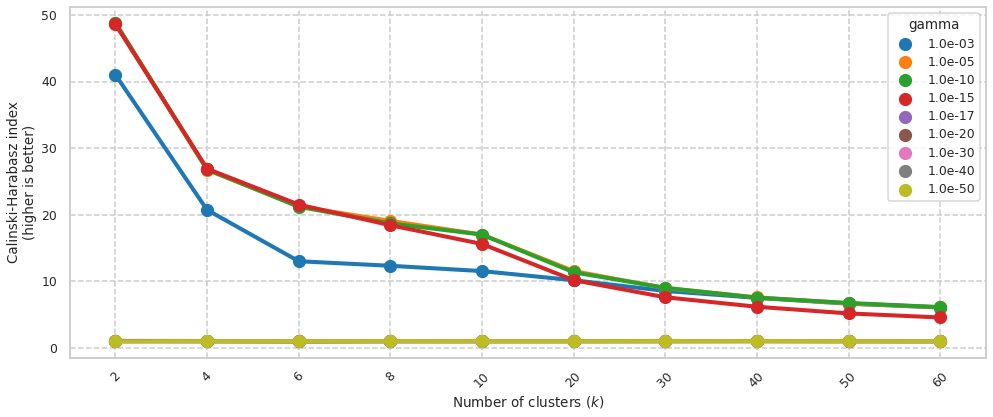

In [48]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score", hue="gamma")
    ax.set_ylabel("Calinski-Harabasz index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

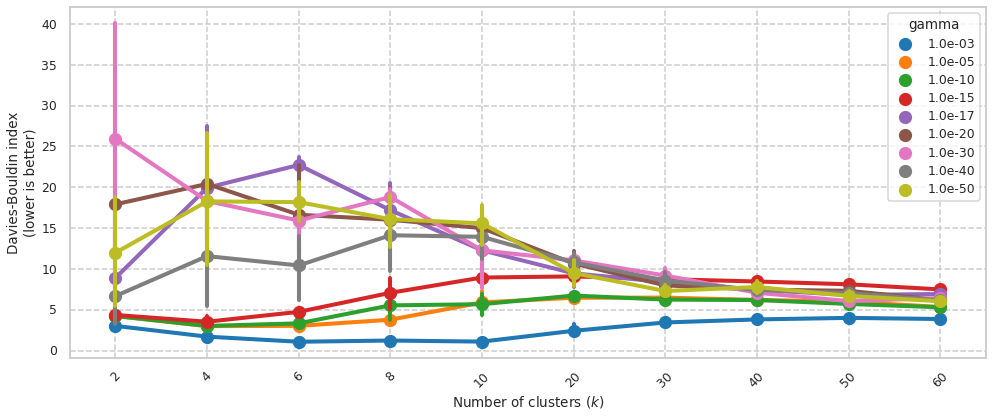

In [49]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="db_score", hue="gamma")
    ax.set_ylabel("Davies-Bouldin index\n(lower is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [50]:
parts = ensemble.groupby(["gamma", "n_clusters"]).apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [51]:
parts.shape

(90,)

In [52]:
parts.head()

gamma    n_clusters
1.0e-03  2             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         4             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         6             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         8             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         10            [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
dtype: object

In [53]:
parts.iloc[0].shape

(5, 3752)

In [54]:
assert np.all(
    [
        parts.loc[k].shape == (int(CLUSTERING_OPTIONS["N_REPS_PER_K"]), data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [55]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [56]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="n_clusters"
)

In [57]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

1.0e-03  2     1.000000
1.0e-05  2     1.000000
1.0e-03  6     1.000000
         8     1.000000
         10    1.000000
1.0e-10  4     1.000000
         2     1.000000
1.0e-05  4     0.995818
1.0e-10  6     0.986798
1.0e-03  4     0.986266
1.0e-05  8     0.966363
1.0e-15  2     0.906711
1.0e-05  6     0.787118
1.0e-15  6     0.744010
         4     0.695673
Name: n_clusters, dtype: float64

In [58]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)
parts_ari_df.index.rename(["gamma", "n_clusters"], inplace=True)

In [59]:
parts_ari_df.shape

(90, 10)

In [60]:
_n_total_parts = int(
    CLUSTERING_OPTIONS["N_REPS_PER_K"]
)  # * len(CLUSTERING_OPTIONS["GAMMAS"]))

assert int(_n_total_parts * (_n_total_parts - 1) / 2) == parts_ari_df.shape[1]

In [61]:
parts_ari_df.head()

0         1         2         3    4    5    6  \
gamma   n_clusters                                                          
1.0e-03 2           1.000000  1.000000  1.000000  1.000000  1.0  1.0  1.0   
        4           0.965666  0.965666  0.965666  0.965666  1.0  1.0  1.0   
        6           1.000000  1.000000  1.000000  1.000000  1.0  1.0  1.0   
        8           1.000000  1.000000  1.000000  1.000000  1.0  1.0  1.0   
        10          1.000000  1.000000  1.000000  1.000000  1.0  1.0  1.0   

                      7    8    9  
gamma   n_clusters                 
1.0e-03 2           1.0  1.0  1.0  
        4           1.0  1.0  1.0  
        6           1.0  1.0  1.0  
        8           1.0  1.0  1.0  
        10          1.0  1.0  1.0

## Stability plot

In [62]:
parts_ari_df_plot = (
    parts_ari_df.stack().reset_index().rename(columns={"level_2": "idx", 0: "ari"})
)

In [63]:
parts_ari_df_plot.dtypes

gamma          object
n_clusters      int64
idx             int64
ari           float64
dtype: object

In [64]:
parts_ari_df_plot.head()

,gamma,n_clusters,idx,ari
0,1.0e-03,2,0,1.0
1,1.0e-03,2,1,1.0
2,1.0e-03,2,2,1.0
3,1.0e-03,2,3,1.0
4,1.0e-03,2,4,1.0


In [65]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = parts_ari_df_plot.groupby(["n_clusters", "gamma"]).mean()
    display(_df)

idx       ari
n_clusters gamma                 
2          1.0e-03  4.5  1.000000
           1.0e-05  4.5  1.000000
           1.0e-10  4.5  1.000000
           1.0e-15  4.5  0.906711
           1.0e-17  4.5  0.001218
           1.0e-20  4.5 -0.001677
           1.0e-30  4.5 -0.002317
           1.0e-40  4.5  0.013618
           1.0e-50  4.5 -0.000584
4          1.0e-03  4.5  0.986266
           1.0e-05  4.5  0.995818
           1.0e-10  4.5  1.000000
           1.0e-15  4.5  0.695673
           1.0e-17  4.5 -0.003480
           1.0e-20  4.5  0.000769
           1.0e-30  4.5 -0.003668
           1.0e-40  4.5 -0.003335
           1.0e-50  4.5 -0.001827
6          1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.787118
           1.0e-10  4.5  0.986798
           1.0e-15  4.5  0.744010
           1.0e-17  4.5  0.000145
           1.0e-20  4.5  0.000834
           1.0e-30  4.5 -0.002870
           1.0e-40  4.5 -0.002116
           1.0e-50  4.5  0.001750
8          1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.966363
           1.0e-10  4.5  0.580678
           1.0e-15  4.5  0.285271
           1.0e-17  4.5  0.001688
           1.0e-20  4.5 -0.002328
           1.0e-30  4.5 -0.001816
           1.0e-40  4.5 -0.002650
           1.0e-50  4.5 -0.000684
10         1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.451481
           1.0e-10  4.5  0.465165
           1.0e-15  4.5  0.099150
           1.0e-17  4.5  0.003599
           1.0e-20  4.5  0.006737
           1.0e-30  4.5  0.001878
           1.0e-40  4.5  0.004808
           1.0e-50  4.5  0.004643
20         1.0e-03  4.5  0.506257
           1.0e-05  4.5  0.341157
           1.0e-10  4.5  0.291858
           1.0e-15  4.5  0.045794
           1.0e-17  4.5  0.005121
           1.0e-20  4.5  0.000950
           1.0e-30  4.5 -0.000680
           1.0e-40  4.5 -0.002656
           1.0e-50  4.5  0.003205
30         1.0e-03  4.5  0.277301
           1.0e-05  4.5  0.174251
           1.0e-10  4.5  0.179157
           1.0e-15  4.5  0.036122
           1.0e-17  4.5 -0.000306
           1.0e-20  4.5 -0.005909
           1.0e-30  4.5  0.002375
           1.0e-40  4.5 -0.003397
           1.0e-50  4.5  0.003594
40         1.0e-03  4.5  0.248605
           1.0e-05  4.5  0.097989
           1.0e-10  4.5  0.104159
           1.0e-15  4.5  0.028347
           1.0e-17  4.5  0.001807
           1.0e-20  4.5  0.001702
           1.0e-30  4.5  0.003421
           1.0e-40  4.5  0.002674
           1.0e-50  4.5  0.003220
50         1.0e-03  4.5  0.137831
           1.0e-05  4.5  0.085840
           1.0e-10  4.5  0.081443
           1.0e-15  4.5  0.024901
           1.0e-17  4.5  0.003959
           1.0e-20  4.5  0.001257
           1.0e-30  4.5  0.010061
           1.0e-40  4.5  0.000468
           1.0e-50  4.5  0.000552
60         1.0e-03  4.5  0.107163
           1.0e-05  4.5  0.063997
           1.0e-10  4.5  0.065680
           1.0e-15  4.5  0.019289
           1.0e-17  4.5  0.003641
           1.0e-20  4.5  0.007620
           1.0e-30  4.5  0.006208
           1.0e-40  4.5  0.006095
           1.0e-50  4.5  0.005413

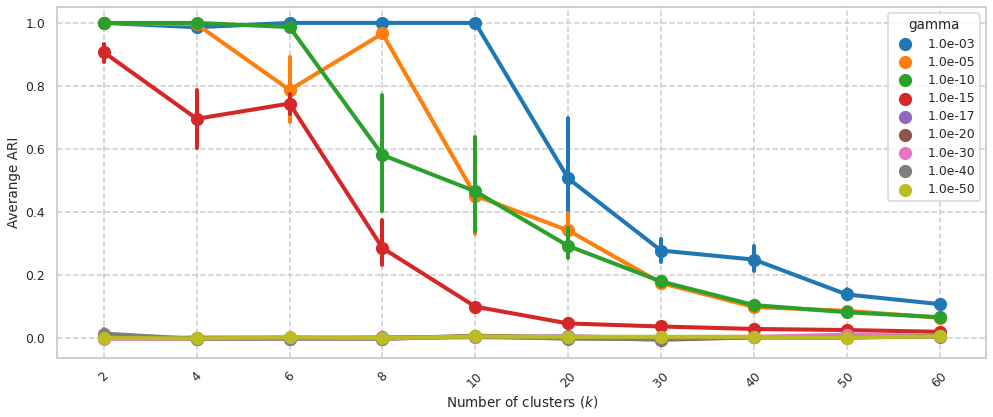

In [66]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="n_clusters", y="ari", hue="gamma")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Conclusions

**UPDATE** We choose `1e-10` as the `gamma` parameter for this data version.